차원에 따른 분포
균등분포라도 차원이 너무 높으면 결과가 다름.

In [1]:
#모든차원에서 [0,1]사이에 균등확율분포로 1000개의 점을 찍은뒤 거리를 히스토그램으로 나타냄.
import numpy
import scipy.spatial
import pandas as pd
import matplotlib.pylab as plt

def his(d):
    data=numpy.random.uniform(size=d*1000).reshape((1000,d))
    distances=scipy.spatial.distance.cdist(data, data)
    pd.Series(distances.reshape(1000000)).hist(bins=50)
    plt.title("%i dimention" % d)
    plt.show()

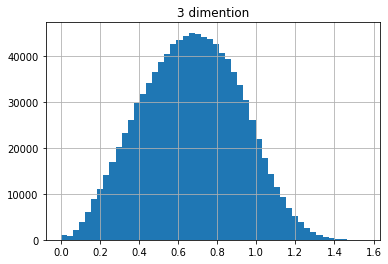

In [2]:
his(3)

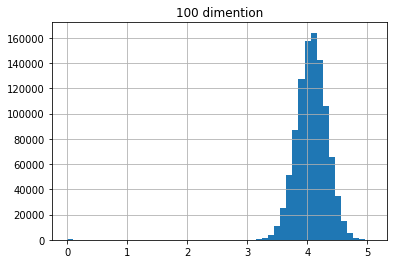

In [3]:
his(100)

# XOR 연산 학습해보기

In [4]:
xor_data=[
    [0,0,0]
    ,[0,1,1]
    ,[1,0,1]
    ,[1,1,0]
]

In [5]:
from sklearn import svm

data=[]
label=[]
for row in xor_data:
    p,q,r=row
    data.append([p,q])
    label.append(r)

clf=svm.SVC()
clf.fit(data,label)

pre=clf.predict(data)
print("예측결과 : ",pre)

ok=0; total=0
for idx, answer in enumerate(label):
    p=pre[idx]
    if p==answer: ok+=1
    total +=1

print("정답률:",ok,"/",total,"=",ok/total)

예측결과 :  [0 1 1 0]
정답률: 4 / 4 = 1.0
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
#using framework
import pandas as pd
from sklearn import svm, metrics

xor_df=pd.DataFrame(xor_data)
data=xor_df.loc[:,0:1]
label=xor_df.loc[:,2]

clf=svm.SVC()
clf.fit(data,label)
pre=clf.predict(data)

ac_score=metrics.accuracy_score(label, pre)
print("정답률=",ac_score)

정답률= 1.0
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
#data save to file
#pickle not for function
import pickle

def saveP(fname,data):
    f=open(fname,mode="wb")
    pickle.dump(clf,f)
    f.close()

def loadP(fname):
    f=open(fname,mode="rb")
    data=pickle.load(f)
    f.close()
    return data


In [8]:
#import pickle
#pickle.dumps(clf)
saveP('clf',clf)
clf2=loadP('clf')

clf2.fit(data,label)
pre=clf2.predict(data)

ac_score=metrics.accuracy_score(label, pre)
print("정답률=",ac_score)

정답률= 1.0
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# svm 예제 - bmi

In [9]:
# bmi 계산
kg=93.2
m=1.68
print( (kg/(m*m) ))


33.02154195011339


In [10]:
# bmi파일 만들기
import random

def calc_bmi(h,w):
    bmi=w/(h/100)**2
    if bmi < 18.5: return "thin" # 멸공
    if bmi < 25: return "normal" # 정공
    return "fat" #돼공

fp=open("bmi-2.csv","w",encoding="utf-8")
fp.write("height,weight,label\n")

cnt={"thin":0,"normal":0,"fat":0}
for i in range(2000):
    h=random.randint(120,200)
    w=random.randint(35,80)
    label=calc_bmi(h,w)
    cnt[label]+=1
    fp.write("{0},{1},{2}\n".format(h,w,label))
fp.close()
print("ok,",cnt)

ok, {'thin': 623, 'normal': 609, 'fat': 768}


In [12]:
# bmi 학습및 test
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

tbl=pd.read_csv("bmi-2.csv")

#정규화
label=tbl["label"]
w=tbl["weight"]/100
h=tbl["height"]/200
wh=pd.concat([w,h],axis=1)

data_train, data_test, label_train, label_test=train_test_split(wh,label)

clf=svm.SVC()
clf.fit(data_train, label_train)

predict=clf.predict(data_test)

ac_score=metrics.accuracy_score(label_test, predict)
cl_report=metrics.classification_report(label_test, predict)

print("정답률 =",ac_score)
print("리포트 =\n",cl_report)

정답률 = 0.968
리포트 =
               precision    recall  f1-score   support

         fat       1.00      0.96      0.98       181
      normal       0.90      1.00      0.95       151
        thin       1.00      0.95      0.97       168

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
saveP("bmi_clf.pickle",clf)

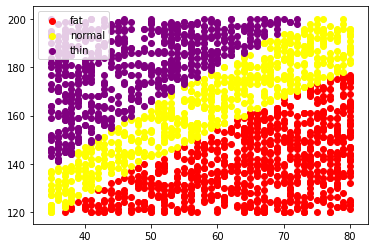

In [14]:
# 시각화
import matplotlib.pyplot as plt
import pandas as pd

tbl=pd.read_csv("bmi-2.csv", index_col=2)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b=tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"],c=color,label=lbl)

scatter("fat","red")
scatter("normal","yellow")
scatter("thin","purple")

ax.legend()
plt.savefig("bmi-test.png")


# random forest

In [15]:
# 돗버섯 데이터 다운로드
import urllib.request as req
local="data\\mushroom.csv"
url="https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

ok


In [33]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

mr=pd.read_csv("data\\mushroom.csv", header=None)



In [29]:
label=[]
data=[]
# 기호를 숫자로 변환 (문자를 문자코드로 변환)
for row_index, row in mr.iterrows():
    label.append(row.iloc[0])
    row_data=[]
    for v in row.iloc[1:]:
        row_data.append(ord(v))
    data.append(row_data)
    

In [34]:
# 매개변수를 배열로 나타냄
"""
관련성이 없다는 것을 나타냄.
빨강 = 1 0 0 0
파랑 = 0 1 0 0
초록 = 0 0 1 0
노랑 = 0 0 0 1
"""
label=[]
data=[]
attr_list=[]
for row_index, row in mr.iterrows():
    label.append(row.iloc[0])
    exdata=[]
    for col, v in enumerate(row.iloc[1:]):
        if row_index==0:
            attr={"dic":{}, "cnt":0}
            attr_list.append(attr)
        else:
            attr=attr_list[col]
        # 버섯의 특징을 배열로 나타내기
        d=[0]*12
        if v in attr["dic"]:# 이미 나왔었던 특징기호
            idx=attr["dic"][v]
        else: # 새로 나온 특징기호
            idx=attr["cnt"]
            attr["dic"][v]=idx
            attr["cnt"]+=1
        d[idx]=1
        exdata+=d
    data.append(exdata)

In [35]:
# 데이터 나누기
data_train, data_test, label_train, label_test=train_test_split(data, label)
# 학습
clf=RandomForestClassifier()
clf.fit(data_train, label_train)

# saveP("mushroom.clf.pickle",clf)

C:\Users\q\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# 테스트, 결과
predict=clf.predict(data_test)

ac_score=metrics.accuracy_score(label_test, predict)
cl_report=metrics.classification_report(label_test, predict)

print("정답률 =",ac_score)
print("리포트 =\n",cl_report)

정답률 = 1.0
리포트 =
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1044
           p       1.00      1.00      1.00       987

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [37]:
print(data[0]) #분류 변수로 저장된 버섯의 특징

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 교차 검증

In [38]:
from sklearn import svm, metrics
import random, re

lines=open('data\\iris.csv','r',encoding='utf-8').read().split('\n')
f_tonum=lambda n : float(n) if re.match(r'^[0-9\.]+$',n) else n
f_cols=lambda li: list(map(f_tonum,li.strip().split(',')))
csv=list(map(f_cols,lines))
del csv[0] # remove headers
random.shuffle(csv)

K=5
csvk=[ [] for i in range(K)]
for i in range(len(csv)):
    csvk[i % K].append(csv[i])

def split_data_label(rows):
    data=[];label=[]
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)

def calc_score(test, train):
    test_f, test_l=split_data_label(test)
    train_f, train_l=split_data_label(train)
    
    clf=svm.SVC()
    clf.fit(train_f, train_l)
    pre=clf.predict(test_f)
    return metrics.accuracy_score(test_l, pre)

score_list=[]
for testc in csvk:
    trainc=[]
    for i in csvk:
        if i != testc: trainc+=i
    sc=calc_score(testc, trainc)
    score_list.append(sc)
    
print("각각의 정답률 =",score_list)
print("평균 정답률 = ",sum(score_list)/len(score_list))

각각의 정답률 = [0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 1.0]
평균 정답률 =  0.9733333333333334
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning

In [39]:
# scikit-learn 사용
from sklearn import svm, metrics, model_selection
import pandas as pd
import random, re

csv=pd.read_csv('data\\iris.csv')

data=csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
label=csv["Name"]

clf=svm.SVC()
print("학습기=", clf)
scores=model_selection.cross_val_score(clf, data, label, cv=5)
print("각각의 정답률 =",scores)
print("평균 정답률 = ",scores.mean())

학습기= SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
각각의 정답률 = [0.96666667 1.         0.96666667 0.96666667 1.        ]
평균 정답률 =  0.9800000000000001
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\q\Anaconda3\lib\site-packages\sklearn\svm\

In [40]:
# scikit-learn 사용 + 그리드 서치
import pandas as pd
from sklearn import svm, metrics, model_selection
from sklearn.model_selection import GridSearchCV
# from sklearn.grid_search import GridSearchCV


csv=pd.read_csv('data\\iris.csv')

data=csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
label=csv["Name"]

#매개변수 설정
params=[
    {"C":[1,10,100,1000], "kernel":["linear"]},
    {"C":[1,10,100,1000], "kernel":["rbf"], "gamma":[0.001,0.0001]}
]

clf=GridSearchCV(svm.SVC(), params, n_jobs=-1, cv=5) # grid search with cross-val
# print("학습기=", clf)
clf.fit(data, label)
# print("학습기=", clf)
print("학습기=", clf.best_estimator_)

# scores=model_selection.cross_val_score(clf, data, label, cv=5)
# print("각각의 정답률 =",scores)
# print("평균 정답률 = ",scores.mean())
# print("학습기=", clf)
# 테스트, 결과
predict=clf.predict(data)

ac_score=metrics.accuracy_score(label, predict)
cl_report=metrics.classification_report(label, predict)

print("정답률 =",ac_score)
print("리포트 =\n",cl_report)

학습기= SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
정답률 = 0.9933333333333333
리포트 =
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.98      0.99        50
 Iris-virginica       0.98      1.00      0.99        50

       accuracy                           0.99       150
      macro avg       0.99      0.99      0.99       150
   weighted avg       0.99      0.99      0.99       150

